## Q1. Decision Tree Classification – Credit Data


Consider the dataset in 01_credit_data.csv file with the following:
-  A1 - A15 = Attributes
-  T - Target (positive or negative credit)

Split the data into train and test (75% - 25%) and train a decision tree using sklearn’s DecisionTreeClassifier() with 2 different methods:
- 1) ID3 (criterion = 'entropy')
- 2) CART (criterion = 'gini')

Find the accuracy on test data for the 2 different methods. 
Why do you think they are so?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import sklearn



In [2]:
df_cc = pd.read_csv('01_credit_data.csv')
df_cc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,T
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [3]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  T       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
X_Raw = df_cc.drop(columns = 'T')
X_Raw = pd.get_dummies(X_Raw, drop_first = True)
Y_Raw = df_cc['T']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Raw, Y_Raw, test_size=0.25, random_state=1)

[Text(0.5350467289719626, 0.975, 'A9_t <= 0.5\nentropy = 0.992\nsamples = 517\nvalue = [232, 285]'),
 Text(0.21495327102803738, 0.925, 'A3 <= 0.168\nentropy = 0.392\nsamples = 246\nvalue = [19, 227]'),
 Text(0.1308411214953271, 0.875, 'A8 <= 1.0\nentropy = 0.998\nsamples = 19\nvalue = [9, 10]'),
 Text(0.11214953271028037, 0.825, 'A7_v <= 0.5\nentropy = 0.977\nsamples = 17\nvalue = [7, 10]'),
 Text(0.07476635514018691, 0.775, 'A7_ff <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.056074766355140186, 0.725, 'A2_34.58 <= 0.5\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.037383177570093455, 0.675, 'A2_20.42 <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.018691588785046728, 0.625, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.056074766355140186, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07476635514018691, 0.675, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09345794392523364, 0.725, 'entropy = 0.0\nsamples = 

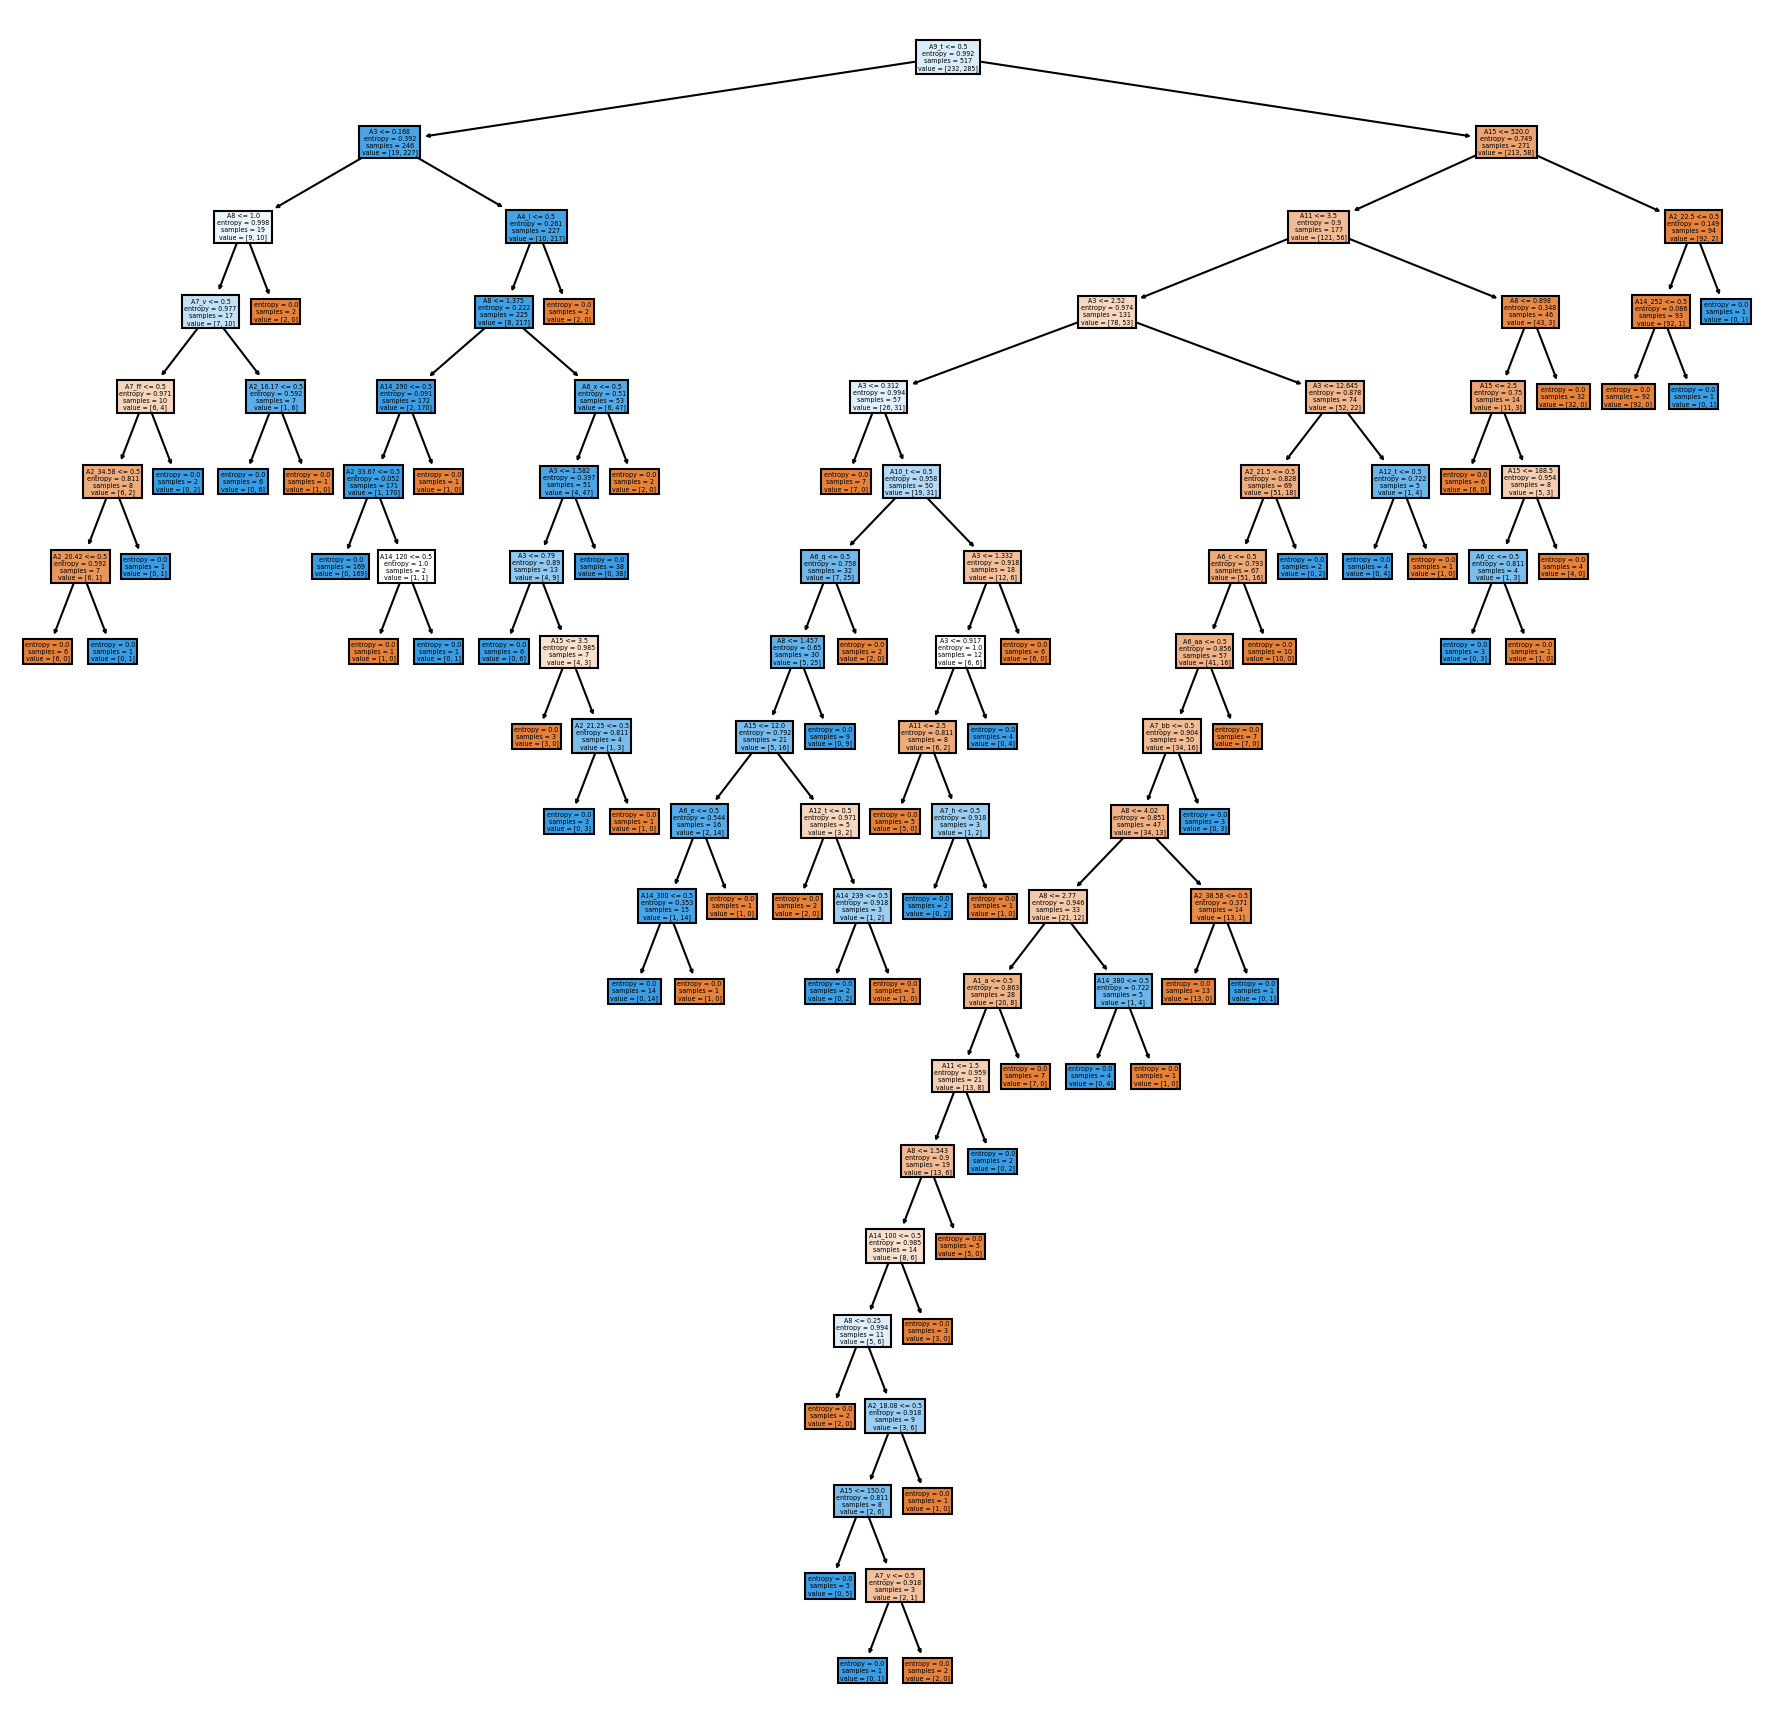

In [5]:
model_cc_id3 = DecisionTreeClassifier(criterion = 'entropy')

model_cc_id3.fit(X_Train, Y_Train)

plt.figure(figsize=(15,15), dpi=150)

plot_tree(model_cc_id3, feature_names=X_Train.columns, filled=True)

In [6]:
text_representation = export_text(model_cc_id3)
print(text_representation)


|--- feature_384 <= 0.50
|   |--- feature_0 <= 0.17
|   |   |--- feature_1 <= 1.00
|   |   |   |--- feature_382 <= 0.50
|   |   |   |   |--- feature_377 <= 0.50
|   |   |   |   |   |--- feature_197 <= 0.50
|   |   |   |   |   |   |--- feature_51 <= 0.50
|   |   |   |   |   |   |   |--- class: +
|   |   |   |   |   |   |--- feature_51 >  0.50
|   |   |   |   |   |   |   |--- class: -
|   |   |   |   |   |--- feature_197 >  0.50
|   |   |   |   |   |   |--- class: -
|   |   |   |   |--- feature_377 >  0.50
|   |   |   |   |   |--- class: -
|   |   |   |--- feature_382 >  0.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- class: -
|   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |--- class: +
|   |   |--- feature_1 >  1.00
|   |   |   |--- class: +
|   |--- feature_0 >  0.17
|   |   |--- feature_355 <= 0.50
|   |   |   |--- feature_1 <= 1.38
|   |   |   |   |--- feature_465 <= 0.50
|   |   |   |   |   |--- feature_188 <= 0.50
|   |   |   |   |   |   |--- clas

In [7]:
model_cc_id3.get_depth()

19

In [8]:
model_cc_id3_train_acc =model_cc_id3.score(X_Train, Y_Train)
model_cc_id3_test_acc = model_cc_id3.score(X_Test, Y_Test)

print('Training Accuracy = ', model_cc_id3_train_acc, 'Test Accuracy =', round(model_cc_id3_test_acc,3))

Training Accuracy =  1.0 Test Accuracy = 0.815


[Text(0.4731104651162791, 0.9666666666666667, 'A9_t <= 0.5\ngini = 0.495\nsamples = 517\nvalue = [232, 285]'),
 Text(0.22093023255813954, 0.9, 'A3 <= 0.168\ngini = 0.143\nsamples = 246\nvalue = [19, 227]'),
 Text(0.13953488372093023, 0.8333333333333334, 'A7_v <= 0.5\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(0.09302325581395349, 0.7666666666666667, 'A7_ff <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.06976744186046512, 0.7, 'A2_20.42 <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.046511627906976744, 0.6333333333333333, 'A2_34.58 <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.023255813953488372, 0.5666666666666667, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.06976744186046512, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09302325581395349, 0.6333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11627906976744186, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1860465116279

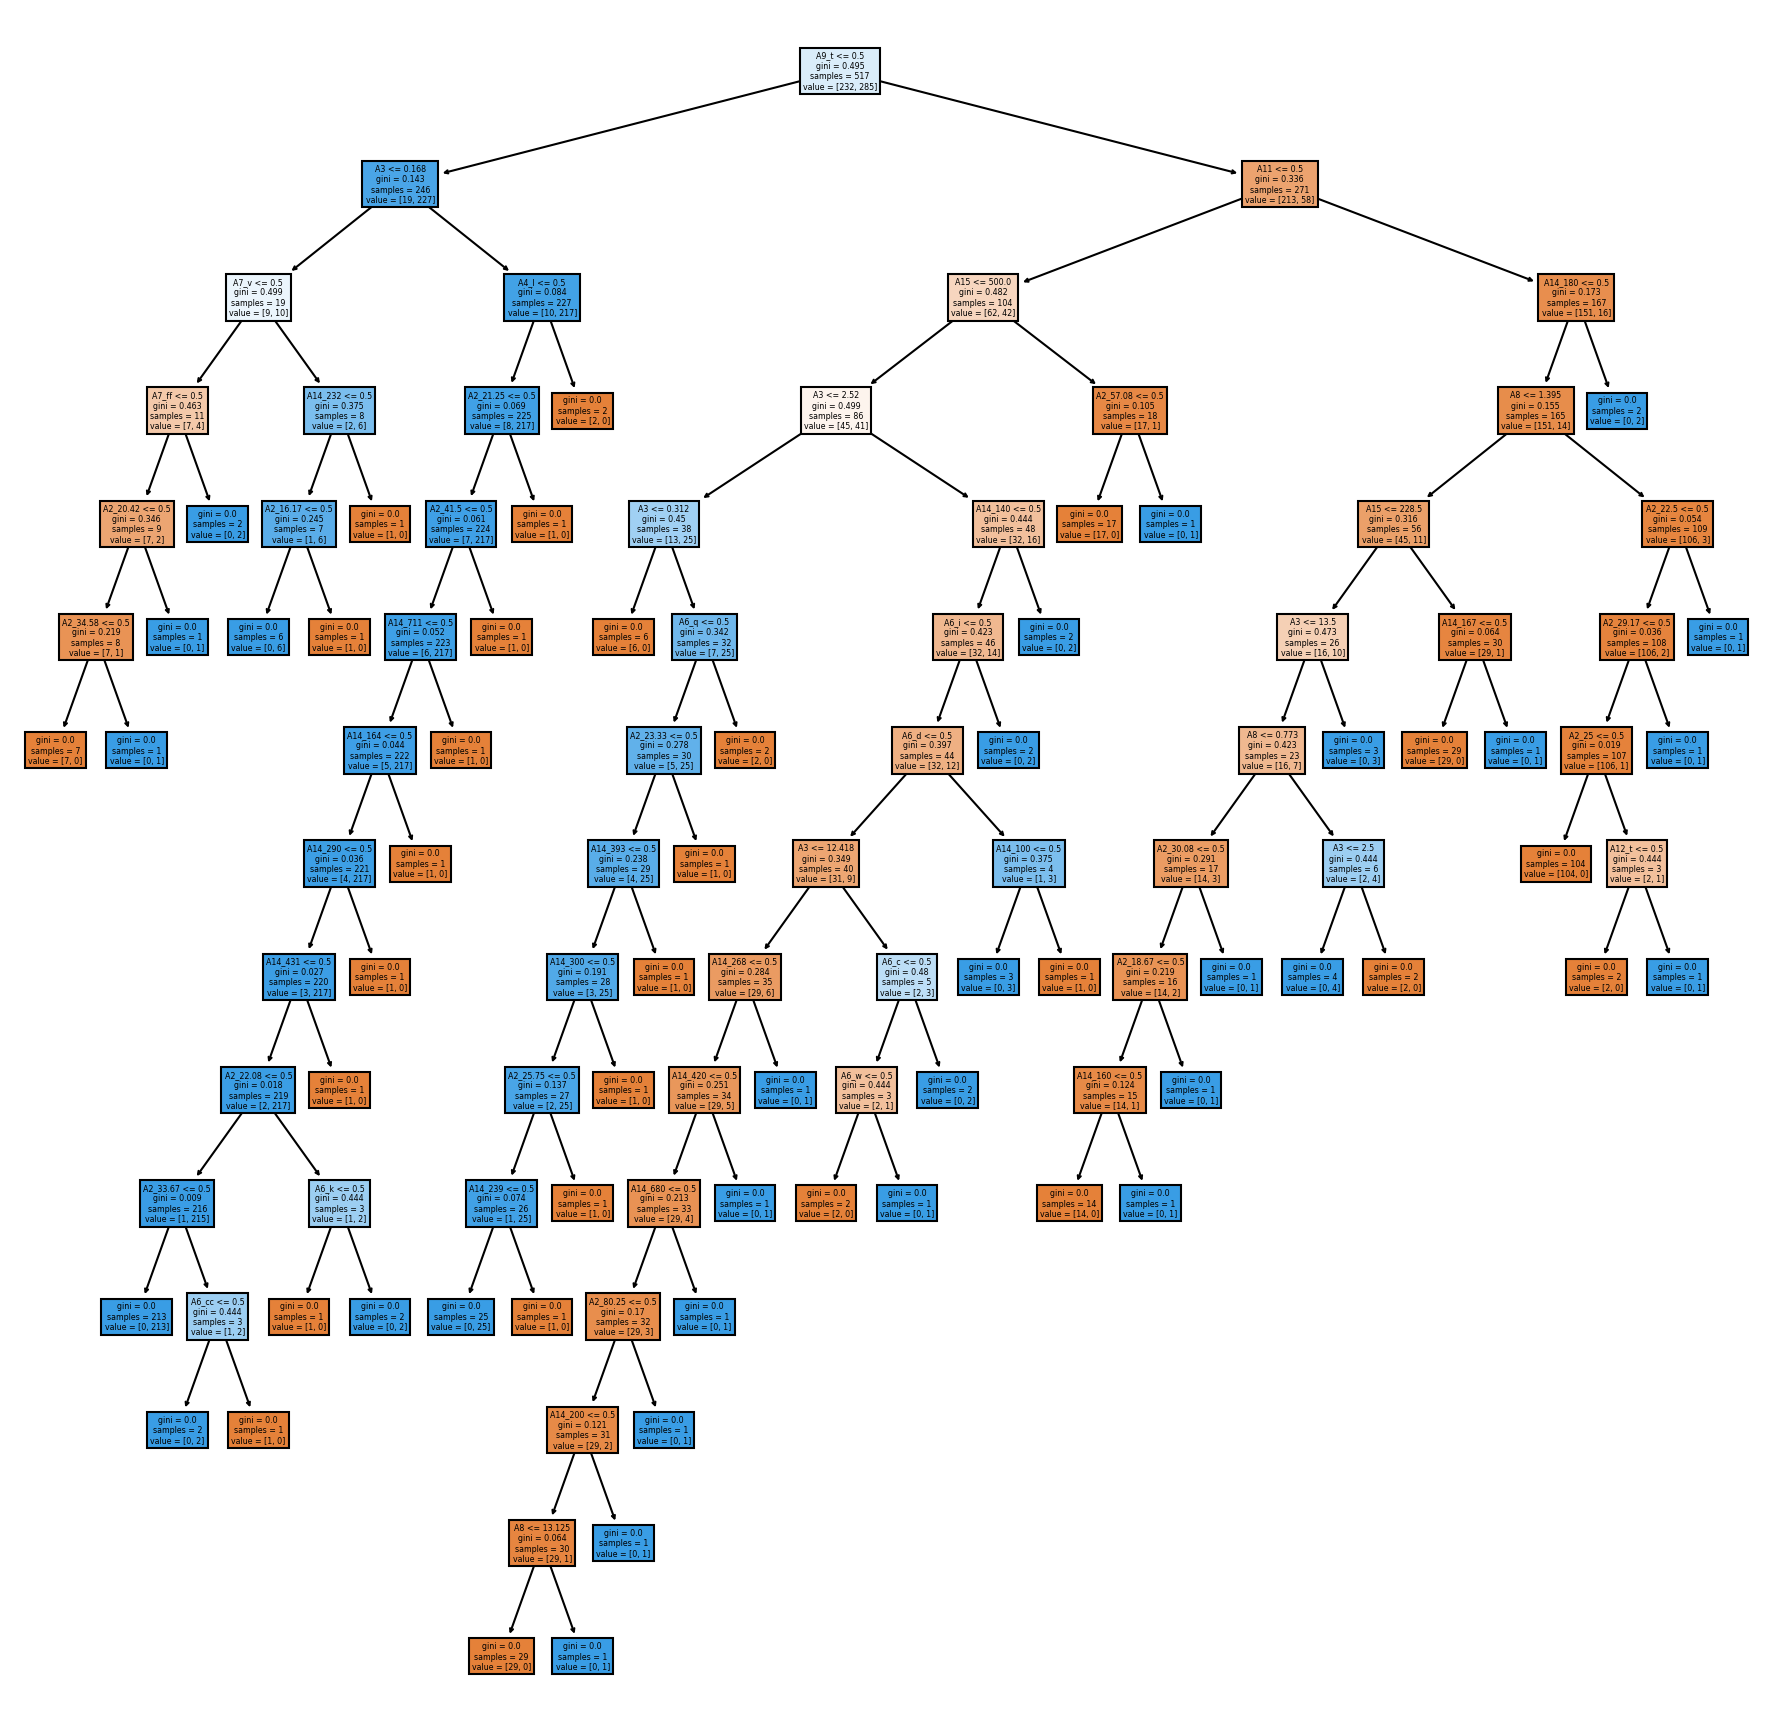

In [9]:
model_cc_cart = DecisionTreeClassifier(criterion = 'gini')

model_cc_cart.fit(X_Train, Y_Train)

plt.figure(figsize=(15,15), dpi=150)

plot_tree(model_cc_cart, feature_names=X_Train.columns, filled=True)

In [10]:
text_representation = export_text(model_cc_cart)
print(text_representation)


|--- feature_384 <= 0.50
|   |--- feature_0 <= 0.17
|   |   |--- feature_382 <= 0.50
|   |   |   |--- feature_377 <= 0.50
|   |   |   |   |--- feature_51 <= 0.50
|   |   |   |   |   |--- feature_197 <= 0.50
|   |   |   |   |   |   |--- class: +
|   |   |   |   |   |--- feature_197 >  0.50
|   |   |   |   |   |   |--- class: -
|   |   |   |   |--- feature_51 >  0.50
|   |   |   |   |   |--- class: -
|   |   |   |--- feature_377 >  0.50
|   |   |   |   |--- class: -
|   |   |--- feature_382 >  0.50
|   |   |   |--- feature_446 <= 0.50
|   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |--- class: -
|   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |--- class: +
|   |   |   |--- feature_446 >  0.50
|   |   |   |   |--- class: +
|   |--- feature_0 >  0.17
|   |   |--- feature_355 <= 0.50
|   |   |   |--- feature_59 <= 0.50
|   |   |   |   |--- feature_252 <= 0.50
|   |   |   |   |   |--- feature_541 <= 0.50
|   |   |   |   |   |   |--- feature_413 <= 0.50
|   |   |   |  

In [11]:
model_cc_cart.get_depth()

14

In [12]:
model_cc_cart_train_acc =model_cc_cart.score(X_Train, Y_Train)
model_cc_cart_test_acc = model_cc_cart.score(X_Test, Y_Test)

print('Training Accuracy = ', model_cc_cart_train_acc, 'Test Accuracy =', round(model_cc_cart_test_acc,3))

Training Accuracy =  1.0 Test Accuracy = 0.855


#### Thus we can observe that the accuracy for CART (86.7%) is higher than ID3(81.5%). The potential reason can be that ID3 is more preferred for categorical data, whereas CART can work with both categorical and numerical data. In the present example, we have both categorical and numerical data, hence CART may be giving higher accuracy. The CART model depth is also lesser than ID3 (14 vs 19)

Ref - https://medium.com/@abedinia.aydin/survey-of-the-decision-trees-algorithms-cart-c4-5-id3-97df842831cd

## Q2. Decision Tree Regression – MBA Starting Salary

The average starting salary of MBA graduates in US is provided in the file 02_MBA_Starting_Salary.xlsx.
Use the attributes below to predict the Avg Starting salary:
- Type
- Enrollment
- Avg GMAT
- Resident Tuition, Fees
- Pct International
- Pct Female
- Pct Asian American
- Pct Minority
- Pct with job offers


- 1) Train a Decision tree by dropping the rows with missing values
- 2) Impute the missing values in each column using KNN imputer, and then train a model
- 3) Compare the score of both the above models. Use 5-fold CV score in both cases, with same model hyper-parameters (depth, etc)

In [13]:
df_mba_sal = pd.read_excel('02_MBA_Starting_Salary.xlsx', sheet_name ="MBA Data")
df_mba_sal.head()

,Fulltime Business Week Ranking,School Name,State,Type,Enrollment,Avg GMAT,"Resident Tuition, Fees",Pct International,Pct Female,Pct Asian American,Pct Minority,Pct with job offers,Avg starting base salary
0,1,University of Chicago,Illinois,Private,1144,713.0,97165.0,35.0,35.0,16.0,7.0,92.0,107091.0
1,2,Harvard University,Massachusetts,Private,1801,720.0,101660.0,33.0,38.0,NaN,NaN,94.0,124378.0
2,3,Northwestern University,Illinois,Private,1200,711.0,93918.0,34.0,36.0,25.0,13.0,95.0,108064.0
3,4,University of Pennsylvania,Pennsylvania,Private,1651,714.0,104410.0,44.0,36.0,7.8,9.0,89.0,112186.0
4,5,University of Michigan,Michigan,Public,898,706.0,80879.0,27.0,34.0,21.0,13.0,89.0,103608.0


In [14]:
df_mba_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fulltime Business Week Ranking  70 non-null     object 
 1   School Name                     70 non-null     object 
 2   State                           70 non-null     object 
 3   Type                            70 non-null     object 
 4   Enrollment                      70 non-null     int64  
 5   Avg GMAT                        67 non-null     float64
 6   Resident Tuition, Fees          68 non-null     float64
 7   Pct International               68 non-null     float64
 8   Pct Female                      68 non-null     float64
 9   Pct Asian American              63 non-null     float64
 10  Pct Minority                    66 non-null     float64
 11  Pct with job offers             67 non-null     float64
 12  Avg starting base salary        67 non

In [15]:
df_mba_sal_drop_na = df_mba_sal.dropna(axis = 0)

df_mba_sal_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Fulltime Business Week Ranking  60 non-null     object 
 1   School Name                     60 non-null     object 
 2   State                           60 non-null     object 
 3   Type                            60 non-null     object 
 4   Enrollment                      60 non-null     int64  
 5   Avg GMAT                        60 non-null     float64
 6   Resident Tuition, Fees          60 non-null     float64
 7   Pct International               60 non-null     float64
 8   Pct Female                      60 non-null     float64
 9   Pct Asian American              60 non-null     float64
 10  Pct Minority                    60 non-null     float64
 11  Pct with job offers             60 non-null     float64
 12  Avg starting base salary        60 non

In [16]:
X_Raw = df_mba_sal_drop_na.drop(columns = 'Avg starting base salary')
X_Raw = pd.get_dummies(X_Raw, drop_first = True)
Y_Raw = df_mba_sal_drop_na['Avg starting base salary']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Raw, Y_Raw, test_size=0.25, random_state=1)

[Text(0.430327868852459, 0.9583333333333334, 'Enrollment <= 344.5\nsquared_error = 144020348.585\nsamples = 45\nvalue = 89835.644'),
 Text(0.13729508196721313, 0.875, 'Pct with job offers <= 55.5\nsquared_error = 75701751.438\nsamples = 26\nvalue = 82059.846'),
 Text(0.04918032786885246, 0.7916666666666666, 'Pct Asian American <= 22.0\nsquared_error = 71501404.667\nsamples = 3\nvalue = 64518.0'),
 Text(0.03278688524590164, 0.7083333333333334, 'Enrollment <= 187.5\nsquared_error = 13289670.25\nsamples = 2\nvalue = 58921.5'),
 Text(0.01639344262295082, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 55276.0'),
 Text(0.04918032786885246, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 62567.0'),
 Text(0.06557377049180328, 0.7083333333333334, 'squared_error = 0.0\nsamples = 1\nvalue = 75711.0'),
 Text(0.22540983606557377, 0.7916666666666666, 'Pct Asian American <= 4.5\nsquared_error = 30877455.297\nsamples = 23\nvalue = 84347.913'),
 Text(0.11475409836065574, 0.7083333333333334, 'Enrol

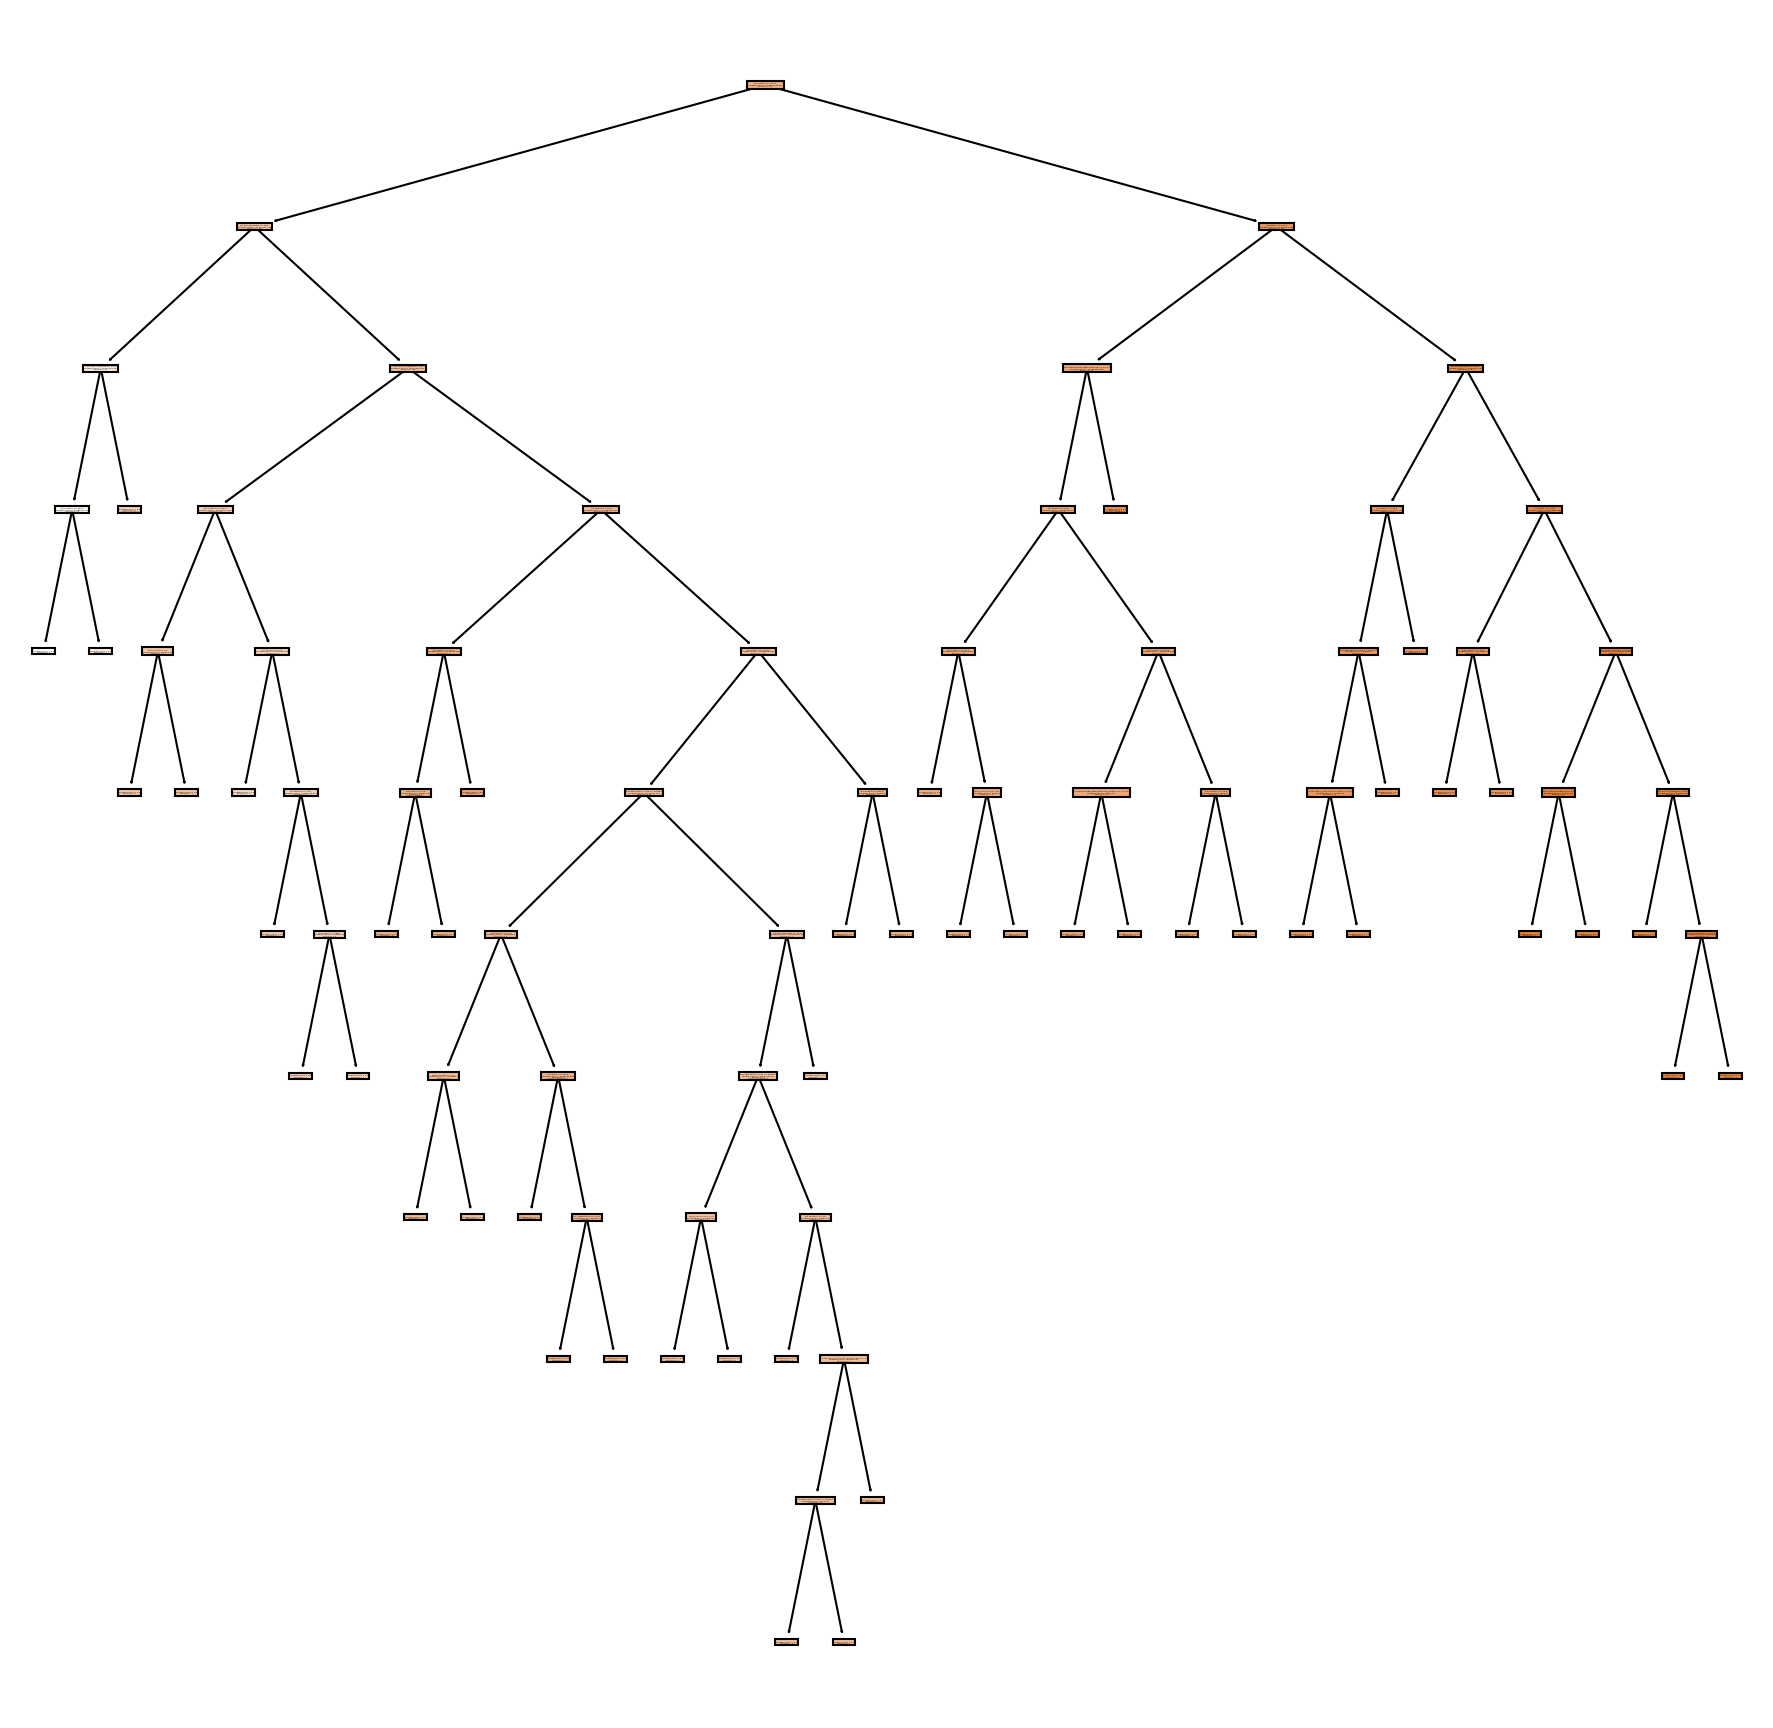

In [17]:
model_cc_mba_sal_drop_na = DecisionTreeRegressor(random_state = 0)

model_cc_mba_sal_drop_na.fit(X_Train, Y_Train)

plt.figure(figsize=(15,15), dpi=150)

plot_tree(model_cc_mba_sal_drop_na, feature_names=X_Train.columns, filled=True)

In [18]:
text_representation = export_text(model_cc_mba_sal_drop_na)
print(text_representation)


|--- feature_0 <= 344.50
|   |--- feature_7 <= 55.50
|   |   |--- feature_5 <= 22.00
|   |   |   |--- feature_0 <= 187.50
|   |   |   |   |--- value: [55276.00]
|   |   |   |--- feature_0 >  187.50
|   |   |   |   |--- value: [62567.00]
|   |   |--- feature_5 >  22.00
|   |   |   |--- value: [75711.00]
|   |--- feature_7 >  55.50
|   |   |--- feature_5 <= 4.50
|   |   |   |--- feature_0 <= 141.00
|   |   |   |   |--- feature_100 <= 0.50
|   |   |   |   |   |--- value: [80525.00]
|   |   |   |   |--- feature_100 >  0.50
|   |   |   |   |   |--- value: [82380.00]
|   |   |   |--- feature_0 >  141.00
|   |   |   |   |--- feature_6 <= 6.50
|   |   |   |   |   |--- value: [71932.00]
|   |   |   |   |--- feature_6 >  6.50
|   |   |   |   |   |--- feature_4 <= 30.50
|   |   |   |   |   |   |--- value: [78222.00]
|   |   |   |   |   |--- feature_4 >  30.50
|   |   |   |   |   |   |--- feature_0 <= 188.00
|   |   |   |   |   |   |   |--- value: [76559.00]
|   |   |   |   |   |   |--- feature_0 

In [19]:
model_cc_mba_sal_drop_na.get_depth()

11

In [20]:
model_mba_sal_drop_na_train_acc =model_cc_mba_sal_drop_na.score(X_Train, Y_Train)
model_mba_sal_drop_na_test_acc = model_cc_mba_sal_drop_na.score(X_Test, Y_Test)

from sklearn.model_selection import cross_val_score

model_mba_sal_drop_na_cv_train_acc = cross_val_score(model_cc_mba_sal_drop_na,X_Train, Y_Train, cv = 5, scoring = 'neg_mean_absolute_error')
model_mba_sal_drop_na_cv_test_acc = cross_val_score(model_cc_mba_sal_drop_na, X_Test, Y_Test, cv = 5, scoring = 'neg_mean_absolute_error')

print('Training Accuracy = ', model_mba_sal_drop_na_train_acc, 'Test Accuracy =', round(model_mba_sal_drop_na_test_acc,3))

print('CV Training Accuracy - dropNA = ', model_mba_sal_drop_na_cv_train_acc, '\n','CV Test Accuracy - dropNA  =', model_mba_sal_drop_na_cv_test_acc)

Training Accuracy =  1.0 Test Accuracy = 0.056
CV Training Accuracy - dropNA =  [ -5646.          -5942.66666667  -7614.          -3857.77777778
 -10591.33333333] 
 CV Test Accuracy - dropNA  = [-13339.33333333 -12199.33333333 -27119.         -12665.
  -9383.33333333]


#### Attempting the same model with a KNN imputed data set

Ref - https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e

In [21]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#For KNN imputer, we need to scale the data

scaler = MinMaxScaler()
df_mba_sal_encoded = pd.get_dummies(df_mba_sal, drop_first = True)

df_mba_sal_scaled = pd.DataFrame(scaler.fit_transform(df_mba_sal_encoded), columns = df_mba_sal_encoded.columns)
df_mba_sal_scaled.head()



,Enrollment,Avg GMAT,"Resident Tuition, Fees",Pct International,Pct Female,Pct Asian American,Pct Minority,Pct with job offers,Avg starting base salary,Fulltime Business Week Ranking_2,...,State_Ohio,State_Pennsylvania,State_Tennessee,State_Texas,State_Utah,State_Virginia,State_Washington,State_Washington D.C.,State_Wisconsin,Type_Public
0,0.628394,0.923077,0.916989,0.583333,0.416667,0.551724,0.062500,0.911765,0.836400,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.964497,0.968491,0.541667,0.500000,NaN,NaN,0.941176,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.660068,0.911243,0.879786,0.562500,0.444444,0.862069,0.125000,0.955882,0.845608,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.915158,0.928994,1.000000,0.770833,0.444444,0.268966,0.083333,0.867647,0.884618,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.489253,0.881657,0.730390,0.416667,0.388889,0.724138,0.125000,0.867647,0.803437,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
imputer = KNNImputer(n_neighbors=5)
df_mba_sal_scaled_imputed = pd.DataFrame(imputer.fit_transform(df_mba_sal_scaled),columns = df_mba_sal_scaled.columns)


df_mba_sal_scaled_imputed.isna().sum().value_counts()

0    137
dtype: int64

In [23]:
X_Raw = df_mba_sal_scaled_imputed.drop(columns = 'Avg starting base salary')
Y_Raw = df_mba_sal_scaled_imputed['Avg starting base salary']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Raw, Y_Raw, test_size=0.25, random_state=1)


[Text(0.4876302083333333, 0.9583333333333334, 'Avg GMAT <= 0.713\nsquared_error = 0.024\nsamples = 52\nvalue = 0.679'),
 Text(0.12630208333333334, 0.875, 'Pct International <= 0.927\nsquared_error = 0.018\nsamples = 29\nvalue = 0.584'),
 Text(0.10963541666666667, 0.7916666666666666, 'Pct with job offers <= 0.375\nsquared_error = 0.006\nsamples = 28\nvalue = 0.605'),
 Text(0.03333333333333333, 0.7083333333333334, 'Pct Asian American <= 0.224\nsquared_error = 0.004\nsamples = 2\nvalue = 0.409'),
 Text(0.016666666666666666, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 0.472'),
 Text(0.05, 0.625, 'squared_error = 0.0\nsamples = 1\nvalue = 0.346'),
 Text(0.1859375, 0.7083333333333334, 'Avg GMAT <= 0.411\nsquared_error = 0.003\nsamples = 26\nvalue = 0.62'),
 Text(0.08333333333333333, 0.625, 'Pct Female <= 0.469\nsquared_error = 0.001\nsamples = 6\nvalue = 0.562'),
 Text(0.05, 0.5416666666666666, 'School Name_The University of Tennessee at Knoxville <= 0.5\nsquared_error = 0.001\nsamples

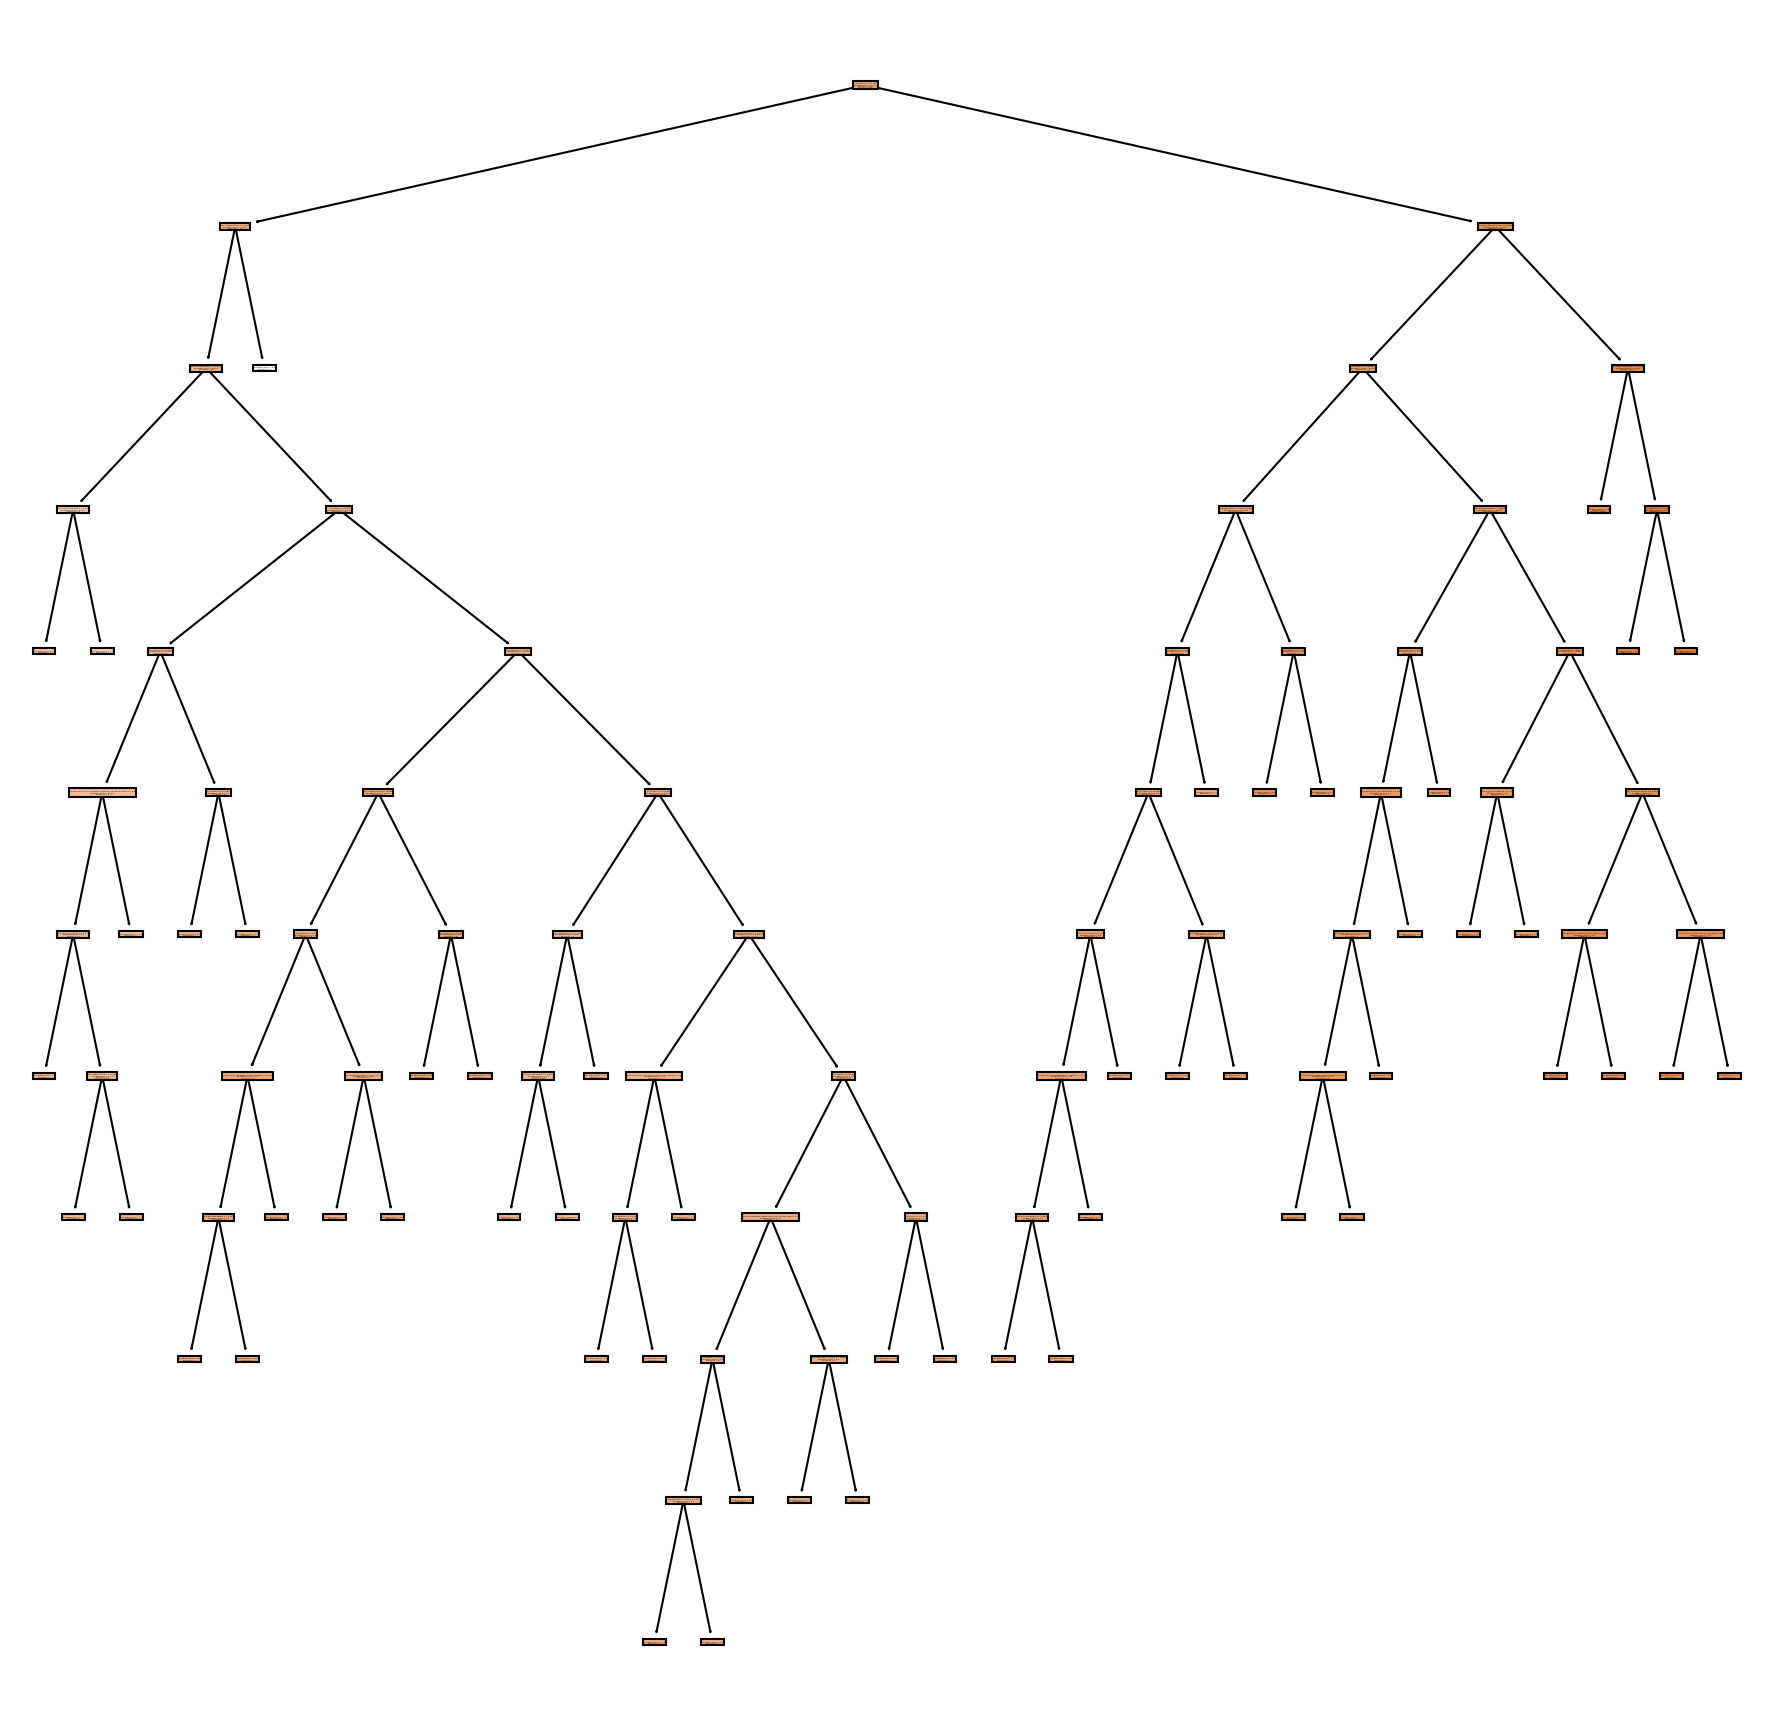

In [24]:
model_mba_sal_scaled_imputed = DecisionTreeRegressor(random_state = 0)

model_mba_sal_scaled_imputed.fit(X_Train, Y_Train)

plt.figure(figsize=(15,15), dpi=150)

plot_tree(model_mba_sal_scaled_imputed, feature_names=X_Train.columns, filled=True)

In [25]:
text_representation = export_text(model_mba_sal_scaled_imputed)
print(text_representation)


|--- feature_1 <= 0.71
|   |--- feature_3 <= 0.93
|   |   |--- feature_7 <= 0.38
|   |   |   |--- feature_5 <= 0.22
|   |   |   |   |--- value: [0.47]
|   |   |   |--- feature_5 >  0.22
|   |   |   |   |--- value: [0.35]
|   |   |--- feature_7 >  0.38
|   |   |   |--- feature_1 <= 0.41
|   |   |   |   |--- feature_4 <= 0.47
|   |   |   |   |   |--- feature_76 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 0.18
|   |   |   |   |   |   |   |--- value: [0.54]
|   |   |   |   |   |   |--- feature_5 >  0.18
|   |   |   |   |   |   |   |--- feature_3 <= 0.38
|   |   |   |   |   |   |   |   |--- value: [0.56]
|   |   |   |   |   |   |   |--- feature_3 >  0.38
|   |   |   |   |   |   |   |   |--- value: [0.57]
|   |   |   |   |   |--- feature_76 >  0.50
|   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |--- feature_4 >  0.47
|   |   |   |   |   |--- feature_0 <= 0.05
|   |   |   |   |   |   |--- value: [0.58]
|   |   |   |   |   |--- feature_0 >  0.05
|   |   |   |   |   |   |--- v

In [26]:
model_mba_sal_scaled_imputed.get_depth()

11

In [27]:
model_mba_sal_scaled_imputed_train_acc =model_mba_sal_scaled_imputed.score(X_Train, Y_Train)
model_mba_sal_scaled_imputed_test_acc = model_mba_sal_scaled_imputed.score(X_Test, Y_Test)

print('Training Accuracy = ', model_mba_sal_scaled_imputed_train_acc, 'Test Accuracy =', round(model_mba_sal_scaled_imputed_test_acc,3))

Training Accuracy =  1.0 Test Accuracy = 0.193


In [28]:
model_mba_sal_scaled_imputed_cv_train_acc = cross_val_score(model_mba_sal_scaled_imputed,X_Train, Y_Train, cv = 5, scoring = 'neg_mean_absolute_error')
model_mba_sal_scaled_imputed_cv_test_acc = cross_val_score(model_mba_sal_scaled_imputed, X_Test, Y_Test, cv = 5,scoring = 'neg_mean_absolute_error')


print('CV Training Accuracy - KNN = ', model_mba_sal_scaled_imputed_cv_train_acc.round(3), '\n' 'CV Test Accuracy - KNN =', model_mba_sal_scaled_imputed_cv_test_acc.round(3))

CV Training Accuracy - KNN =  [-0.046 -0.133 -0.206 -0.184 -0.062] 
CV Test Accuracy - KNN = [-0.073 -0.101 -0.118 -0.117 -0.031]


In [29]:
print('CV Training Accuracy - dropNA = ', model_mba_sal_drop_na_cv_train_acc.round(3), '\n''CV Test Accuracy - dropNA  =', model_mba_sal_drop_na_cv_test_acc.round(3))

CV Training Accuracy - dropNA =  [ -5646.     -5942.667  -7614.     -3857.778 -10591.333] 
CV Test Accuracy - dropNA  = [-13339.333 -12199.333 -27119.    -12665.     -9383.333]


#### Thus we can observe that the model score for kNN imputed data is higher than the model when we drop the missing values.

#### Outputs also displayed using the cross_val_score method

In [30]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

## Q3. Ensemble Modeling – Mobile Price

We want to predict the price of mobile phone(range) based on the characteristics of the phone like memory, battery power, camera specification etc. The data for about 2000 phones is provided in 03_mobile_price.csv
- 1) Train a Random Forest classifier to predict the mobile price. What is the accuracy you get with a 5fold CV on the Dataset.
- 2) Now, train a gradient boosting classifier using the same data. How does the score compare with random forest model?

Note that this is multi-class classification.

The data files can be found here: https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/tree/main/ClassAssignment/Assignment09

In [36]:
df_mobile_price = pd.read_csv('03_mobile_price.csv')

print(df_mobile_price.info())

df_mobile_price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     2000 non-null   int64  
 1   blue              2000 non-null   int64  
 2   clock_speed       2000 non-null   float64
 3   dual_sim          2000 non-null   int64  
 4   frontcamera       2000 non-null   int64  
 5   Has4G             2000 non-null   int64  
 6   memory            2000 non-null   int64  
 7   mobile_thickness  2000 non-null   float64
 8   mobile_wt         2000 non-null   int64  
 9   n_cores           2000 non-null   int64  
 10  primarycamera_mp  2000 non-null   int64  
 11  px_height         2000 non-null   int64  
 12  px_width          2000 non-null   int64  
 13  ram               2000 non-null   int64  
 14  screen_height     2000 non-null   int64  
 15  screen_width      2000 non-null   int64  
 16  talk_time         2000 non-null   int64  


,battery_power,blue,clock_speed,dual_sim,frontcamera,Has4G,memory,mobile_thickness,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,Has3G,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [45]:
X_Raw = df_mobile_price.drop(columns = 'price_range')
X_Raw = pd.get_dummies(X_Raw, drop_first = True)
Y_Raw = df_mobile_price['price_range']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Raw, Y_Raw, test_size=0.25, random_state=1)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier


names = ["Decision Tree", 
         "GB", 
        ]

classifiers = [
    DecisionTreeClassifier(max_depth=10),
    GradientBoostingClassifier(n_estimators=50),
]

for name, clf in zip(names, classifiers):
    clf.fit(X_Train, Y_Train)
    trainscore = clf.score(X_Train, Y_Train)
    testscore = clf.score(X_Test, Y_Test)
    print(name, trainscore.round(3), testscore.round(3))

Decision Tree 0.996 0.828
GB 0.975 0.858


In [48]:
#Checking the accuracy of the Decision Tree Classifier

model_mobile_price = DecisionTreeClassifier(max_depth=10).fit(X_Train, Y_Train)

model_mobile_price_train_acc =model_mobile_price.score(X_Train, Y_Train)
model_mobile_price_test_acc = model_mobile_price.score(X_Test, Y_Test)

from sklearn.model_selection import cross_val_score

model_mobile_price_cv_train_acc = cross_val_score(model_mobile_price,X_Train, Y_Train, cv = 5, scoring = 'neg_mean_absolute_error')
model_mobile_price_cv_test_acc = cross_val_score(model_mobile_price, X_Test, Y_Test, cv = 5, scoring = 'neg_mean_absolute_error')

print('Training Accuracy = ', model_mobile_price_train_acc, 'Test Accuracy =', round(model_mobile_price_test_acc,3))

print('CV Training Accuracy = ', model_mobile_price_cv_train_acc, '\n','CV Test Accuracy   =', model_mobile_price_cv_test_acc)


Training Accuracy =  0.996 Test Accuracy = 0.84
CV Training Accuracy =  [-0.18666667 -0.15333333 -0.12333333 -0.14333333 -0.16666667] 
 CV Test Accuracy   = [-0.28 -0.22 -0.25 -0.31 -0.22]


In [50]:
#Checking the accuracy of the Decision Tree Classifier

model_mobile_price = GradientBoostingClassifier(n_estimators=50).fit(X_Train, Y_Train)

model_mobile_price_train_acc =model_mobile_price.score(X_Train, Y_Train)
model_mobile_price_test_acc = model_mobile_price.score(X_Test, Y_Test)

from sklearn.model_selection import cross_val_score

model_mobile_price_cv_train_acc = cross_val_score(model_mobile_price,X_Train, Y_Train, cv = 5, scoring = 'neg_mean_absolute_error')
model_mobile_price_cv_test_acc = cross_val_score(model_mobile_price, X_Test, Y_Test, cv = 5, scoring = 'neg_mean_absolute_error')

print('Training Accuracy = ', model_mobile_price_train_acc, 'Test Accuracy =', round(model_mobile_price_test_acc,3))

print('CV Training Accuracy= ', model_mobile_price_cv_train_acc,'\n','CV Test Accuracy =', model_mobile_price_cv_test_acc)


Training Accuracy =  0.9746666666666667 Test Accuracy = 0.858
CV Training Accuracy=  [-0.11       -0.11333333 -0.08333333 -0.12       -0.12666667] 
 CV Test Accuracy = [-0.23 -0.17 -0.19 -0.16 -0.14]


#### Thus the Gradient Boost Accuracy is marginally better than the DT Classifier (85.8% vs 84%) without cross validation and also with cross validation based on negative mean squared error, the GB Model performs better.